In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

C:\Users\arman\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
vader_df = pd.read_csv('vader_predictions.csv')
lr_df = pd.read_csv('lr_predictions.csv')

def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

vader_metrics = compute_metrics(vader_df['sentiment_label'], vader_df['vader_pred'])
lr_metrics = compute_metrics(lr_df['sentiment_label'], lr_df['lr_pred'])

                     Accuracy  Precision    Recall  F1 Score
VADER                0.644284   0.662202  0.644284  0.648424
Logistic Regression  0.837500   0.838995  0.837500  0.832789


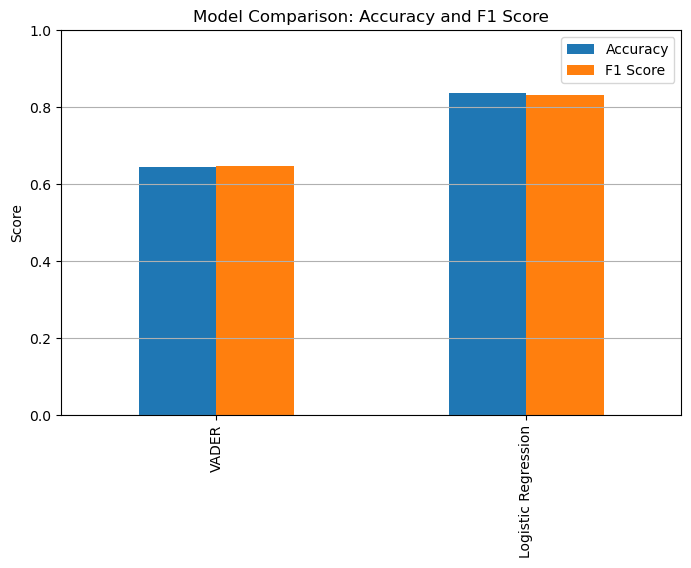

In [4]:
metrics_df = pd.DataFrame([vader_metrics, lr_metrics], index=['VADER', 'Logistic Regression'])
print(metrics_df)

metrics_df[['Accuracy', 'F1 Score']].plot(kind='bar', figsize=(8,5))
plt.title('Model Comparison: Accuracy and F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [6]:
# --- Error Analysis for Logistic Regression ---

fp = lr_df[(lr_df['sentiment_label'] != lr_df['lr_pred']) & (lr_df['lr_pred'] == 'positive')]
fn = lr_df[(lr_df['sentiment_label'] != lr_df['lr_pred']) & (lr_df['lr_pred'] == 'negative')]

In [7]:
print("\nFalse Positives (Predicted positive but actually negative):")
print(fp[['processed_text', 'sentiment_label', 'lr_pred']].head(5))


False Positives (Predicted positive but actually negative):
                                        processed_text sentiment_label  \
16   petrol diesel gotten exorbitant unable contain...        negative   
22   rupee best worst short timeframes irrelevant i...        negative   
53   great read thank many sikh west met turn blind...        negative   
83   bjp darling pre reporting upa scam question mo...         neutral   
124  guy know choose villain right guy promoted mas...        negative   

      lr_pred  
16   positive  
22   positive  
53   positive  
83   positive  
124  positive  


In [8]:
print("\nFalse Negatives (Predicted negative but actually positive):")
print(fn[['processed_text', 'sentiment_label', 'lr_pred']].head(5))


False Negatives (Predicted negative but actually positive):
                                       processed_text sentiment_label  \
20  trying get people watch tape always get downvo...        positive   
36  noticed news channel political agenda channel ...        positive   
57  hell goras travel show channel suddenly headin...         neutral   
82                              sorry deity delicious        positive   
84  divya extreme weather condition already upon c...        positive   

     lr_pred  
20  negative  
36  negative  
57  negative  
82  negative  
84  negative  
